<a href="https://colab.research.google.com/github/SampMark/Machine-Learn/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Regressão Polinomial**

A regressão polinomial é uma extensão da regressão linear, sendo utilizada para modelar relações não lineares entre as variáveis. Em vez de ajustar uma linha reta aos dados, a regressão polinomial ajusta uma curva, o que permite lidar melhor com padrões de dados mais complexos.

Para modelar utiliza-se a biblioteca Scikit-learn, a função `PolynomialFeatures()` transforma as variáveis originais, adicionando termos polinomiais de acordo com o grau especificado. Por exemplo, imagine uma variável 𝑥 como um polinômio de grau 2, serão criados novos recursos: 1, 𝑥, e 𝑥^2. $$ \hat{y} = \theta_0 + \theta_2 x^2 $$

Após a criação de novos recursos, a regressão polinomial é aplicada para encontrar os coeficientes (𝑏, 𝜃<sub>1</sub>, 𝜃<sub>2</sub>, etc) que melhor se ajustam aos dados. O modelo ajustado será capaz de capturar curvaturas nos dados, algo que a regressão linear simples não consegue fazer.

A equação final da regressão polinomial mostra como os diferentes graus de
𝑥 influenciam a variável dependente 𝑦. Isso é útil para prever ou analisar tendências de crescimento que seguem padrões curvilíneos, como o crescimento populacional, consumo de combustível, aumento de vendas ao longo do tempo ou mudanças em variáveis econômicas como Produto Interno Bruto.

Por exemplo, se estivermos tentando prever o consumo de combustível de um carro baseado no tamanho do motor, uma regressão linear pode não capturar as nuances desse relacionamento. Nesse caso, a regressão polinomial de grau 2 pode ajustar melhor a curva de dados, oferecendo previsões mais precisas.

## **Instalando e importando bibliotecas Python**

---



In [1]:
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install seaborn
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## **Importação e Análise Exploratória dos Dados**

---



In [13]:
# importando e explorando os dados
df = pd.read_csv("https://raw.githubusercontent.com/SampMark/files/refs/heads/main/FuelConsumptionCo2.csv")

# Imprime o número de linhas e colunas
print("Número de linhas e colunas:", df.shape)

# Imprime os nomes das colunas/variáveis
print("Variáveis:", df.columns.tolist())
df.head()

Número de linhas e colunas: (1067, 13)
Variáveis: ['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# Selecionando as variáveis independentes de interesse
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


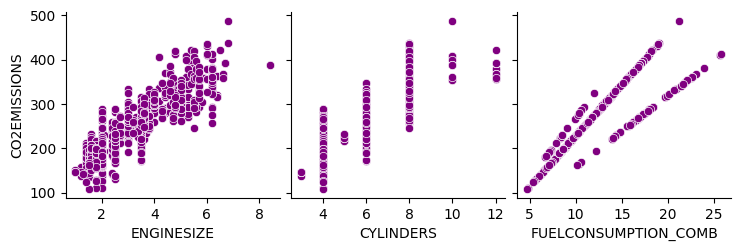

In [5]:
# Plotando gráficos de dispersão em pares para as variáveis selecionadas
sns.pairplot(df, x_vars=['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB'], y_vars='CO2EMISSIONS', kind='scatter', plot_kws={'color': 'purple'})
plt.show()

# **Modelagem em Machine Learn**

---



In [6]:
# Separa os dados nos conjuntos de treinamento (0.8) e teste (0.2), utilizando a função np.random.rand() para mascarar, selecionar linhas aleatoriamente
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

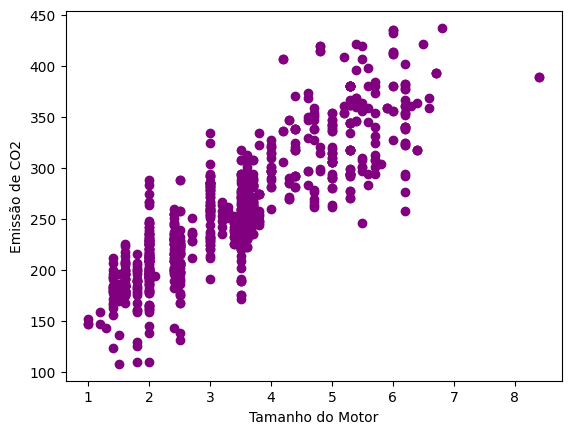

In [7]:
# Treina o modelo com base na distribuição dos dados
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='purple')
plt.xlabel("Tamanho do Motor")
plt.ylabel("Emissão de CO2")
plt.show()

## **Modelo de Regressão Polinomial**

---



In [8]:
# Importa a classe PolynomialFeatures do módulo sklearn.preprocessing
# para gerar recursos polinomiais a partir das variáveis independentes
from sklearn.preprocessing import PolynomialFeatures

# Importa o módulo linear_model do sklearn para criar o modelo de regressão linear
from sklearn import linear_model

# Converte as colunas 'ENGINESIZE' e 'CO2EMISSIONS' do DataFrame 'train' para um array do NumPy
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# Converte as colunas 'ENGINESIZE' e 'CO2EMISSIONS' do DataFrame 'test' para um array do NumPy
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Cria uma instância de PolynomialFeatures com grau 2
# Isso significa que serão gerados termos polinomiais até o 2º grau (x e x^2)
poly = PolynomialFeatures(degree=2)

# Aplica a transformação polinomial aos dados de treinamento
# A função fit_transform() gera novos recursos polinomiais a partir de train_x
train_x_poly = poly.fit_transform(train_x)

# Imprime os dados de treinamento transformados para visualização
print(train_x_poly)
# O resultado é uma matriz com três colunas: [1, x, x^2]

[[ 1.    2.    4.  ]
 [ 1.    2.4   5.76]
 [ 1.    1.5   2.25]
 ...
 [ 1.    3.    9.  ]
 [ 1.    3.2  10.24]
 [ 1.    3.    9.  ]]


In [14]:
# Importa o linear_model do sklearn para criar o modelo de regressão linear
from sklearn import linear_model

# Cria uma instância do modelo de regressão linear
clf = linear_model.LinearRegression()

# Ajusta o modelo de regressão linear usando os dados transformados (polinomiais)
# 'train_x_poly' contém os recursos polinomiais (ex.: 1, x, x^2) e 'train_y' contém as emissões de CO2 (variável dependente)
train_y_ = clf.fit(train_x_poly, train_y)

# Imprime os coeficientes e intercepto do modelo ajustado
# clf.coef_ são os coeficientes de cada termo polinomial no modelo
print('Coeficientes: ', clf.coef_)
# clf.intercept_ é o valor do intercepto na equação de regressão
print('Intercepto: ', clf.intercept_)


Coeficientes:  [[ 0.         51.21261261 -1.65360137]]
Intercepto:  [106.73667107]


Text(0, 0.5, 'Emissão de CO2')

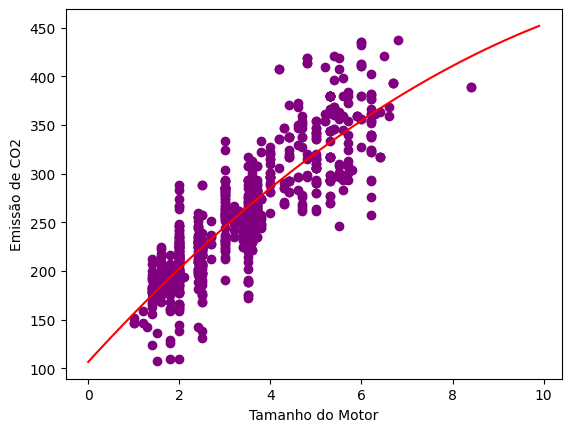

In [10]:
# Importa a biblioteca matplotlib.pyplot para criar gráficos
import matplotlib.pyplot as plt
import numpy as np

# Plota o gráfico de dispersão dos dados de treinamento
# 'train.ENGINESIZE' representa os tamanhos dos motores (variável independente)
# 'train.CO2EMISSIONS' representa as emissões de CO2 (variável dependente)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='purple')

# Gera uma série de valores de 0 a 10 (com intervalos de 0.1) para criar uma linha contínua no gráfico
XX = np.arange(0.0, 10.0, 0.1)

# Calcula os valores preditos de emissões de CO2 usando os coeficientes ajustados do modelo polinomial
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)

# Plota a linha de regressão polinomial no gráfico
# 'XX' são os valores da variável independente e 'yy' são os valores preditos
plt.plot(XX, yy, '-r')

plt.xlabel("Tamanho do Motor")
plt.ylabel("Emissão de CO2")


In [15]:
# Importa a função r2_score do módulo metrics do sklearn para avaliação do modelo
from sklearn.metrics import r2_score

# Transforma os dados de teste usando os mesmos recursos polinomiais do treinamento
test_x_poly = poly.transform(test_x)

# Realiza previsões usando o modelo ajustado com os dados transformados de teste
test_y_ = clf.predict(test_x_poly)

# Calcula e imprime o erro médio absoluto (MAE)
# np.mean(np.absolute(test_y_ - test_y)) calcula a média dos valores absolutos das diferenças entre as previsões e os valores reais
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))

# Calcula e imprime a soma residual dos quadrados (MSE)
# np.mean((test_y_ - test_y) ** 2) calcula a média das diferenças ao quadrado entre as previsões e os valores reais
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))

# Calcula e imprime o coeficiente de determinação (R²)
# r2_score(test_y, test_y_) mede a proporção da variabilidade total explicada pelo modelo
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 21.85
Residual sum of squares (MSE): 821.23
R2-score: 0.81


## **Análise do Resultado**

*   O MAE dá uma ideia do erro médio absoluto, medido em unidades da variável dependente.
*   O MSE dá uma visão mais detalhada das diferenças ao quadrado, o que ajuda a identificar se há erros maiores afetando o modelo.
* O R² oferece uma medida global da eficácia do modelo, permite entender  
quão bem o modelo ajusta os dados de teste em relação à média dos valores reais.

Coefficients:  [[ 0.         25.76456224  5.30042567 -0.57268402]]
Intercept:  [134.03700989]


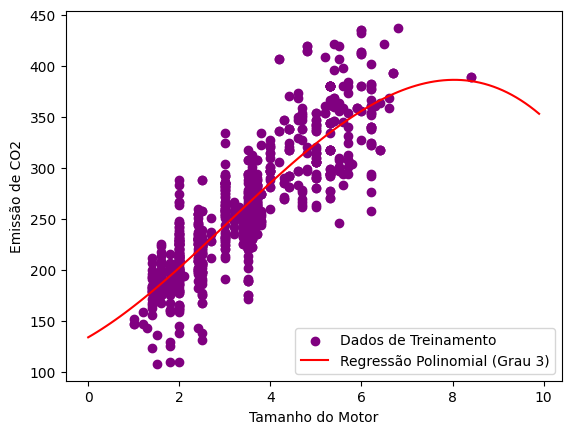

Erro Absoluto Médio (MAE): 21.90
Soma residual dos quadrados (MSE): 826.16
R2-score: 0.81


In [12]:
# Cria uma instância de PolynomialFeatures com grau 3
poly3 = PolynomialFeatures(degree=3)

# Aplica a transformação polinomial aos dados de treinamento
train_x_poly3 = poly3.fit_transform(train_x)

# Cria e ajusta o modelo de regressão linear usando os dados transformados (polinomiais)
clf3 = linear_model.LinearRegression()
clf3.fit(train_x_poly3, train_y)

# Imprime os coeficientes e intercepto do modelo ajustado
print('Coefficients: ', clf3.coef_)
print('Intercept: ', clf3.intercept_)

# Plota o gráfico de dispersão dos dados de treinamento
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='purple', label='Dados de Treinamento')

# Gera uma série de valores de 0 a 10 para criar uma linha contínua no gráfico
XX = np.arange(0.0, 10.0, 0.1)

# Calcula os valores preditos de emissões de CO2 usando os coeficientes ajustados do modelo polinomial de grau 3
yy = (clf3.intercept_[0] +
      clf3.coef_[0][1] * XX +
      clf3.coef_[0][2] * np.power(XX, 2) +
      clf3.coef_[0][3] * np.power(XX, 3))

# Plota a linha de regressão polinomial no gráfico
plt.plot(XX, yy, '-r', label='Regressão Polinomial (Grau 3)')
plt.xlabel("Tamanho do Motor")
plt.ylabel("Emissão de CO2")
plt.legend(loc='best')
plt.show()

# Transforma os dados de teste usando os mesmos recursos polinomiais do treinamento
test_x_poly3 = poly3.transform(test_x)

# Realiza previsões usando o modelo ajustado com os dados transformados de teste
test_y_3 = clf3.predict(test_x_poly3)

# Calcula e imprime as métricas de avaliação
mae = np.mean(np.absolute(test_y_3 - test_y))
mse = np.mean((test_y_3 - test_y) ** 2)
r2 = r2_score(test_y, test_y_3)
print("Erro Absoluto Médio (MAE): %.2f" % mae)
print("Soma residual dos quadrados (MSE): %.2f" % mse)
print("R2-score: %.2f" % r2)

O gráfico mostra um ajuste curvo seguindo a linha de tendência  de regressão polinomial de grau 3 (em vermelho) de dispersão dos dados. Captura, portanto, uma relação **não linear** entre o tamanho do motor e as emissões de CO₂.
A linha de regressão se ajusta à maioria dos pontos de dados, especialmente para tamanhos de motor menores, mas apresenta algumas discrepâncias em motores maiores, o que pode explicar o MSE relativamente alto.

## **Avaliação do Modelo de Regressão Polinomial**

### **Coeficientes e Intercepto**

O modelo ajustou os seguintes coeficientes: 𝜃1 = 28,78, 𝜃2 = 4,28, 𝜃3 = −0,46. O coeficiente negativo de 𝜃3 (associado ao termo cúbico) é esperado, pois representa a tendência de desaceleração no crescimento das emissões à medida que o tamanho do motor aumenta.
Intercepto: 130.55
Representa o ponto em que a curva de regressão intercepta o eixo 𝑦, indicando o valor estimado de emissões de CO₂ quando o tamanho do motor é zero.

### **Métricas de Avaliação**

*   **Erro Absoluto Médio (MAE): 23.07**
O MAE representa o erro médio em termos absolutos, indicando que, em média, as previsões do modelo estão a cerca de 23 unidades das emissões reais de CO₂.
Um MAE menor é desejável, e o valor de 23,07 sugere um ajuste razoável, considerando a escala dos dados.

* **Soma Residual dos Quadrados (MSE): 890.91**
O MSE é a média dos erros ao quadrado, penalizando mais fortemente os grandes desvios. Com um valor de 890,91, o MSE indica que há alguns desvios mais significativos nas previsões, mas o modelo ainda é capaz de capturar a maior parte da variabilidade.

* **Coeficiente de Determinação (R²): 0.79**
O R² de 0,79 indica que o modelo explica 79% da variabilidade total das emissões de CO₂ em relação ao tamanho do motor, o que é considerado um bom ajuste, sugerindo que o modelo de regressão polinomial é capaz de capturar a tendência geral dos dados de forma eficaz.

## **Referências**

GÉRON, A. **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems**. Canada: O’Reilly, 2023.

GUJARATI, Damodar N. **Essentials of econometrics**. Sage Publications, 2021.